In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Save Kyoto_Gases data (2020-2100), consider the case of C1-C8 for simplicity.
Kyoto_Gases = pd.read_csv('Kyoto Gases.csv')
X_Emissions = Kyoto_Gases
X_Emissions = X_Emissions[X_Emissions['Category'].isin(['C1','C2','C3','C4','C5','C6','C7','C8'])]
X_Emissions.reset_index(drop=True,inplace=True)
mapping = {'C1':1,'C2':2,'C3':3,'C4':4,'C5':5,'C6':6,'C7':7,'C8':8}
X_Emissions['Category'].replace(mapping,inplace=True)
X_Emissions.drop(columns=['Category_name'],inplace=True)

C:\Users\l1137\AppData\Local\Temp\ipykernel_10300\3013020388.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Emissions['Category'].replace(mapping,inplace=True)
C:\Users\l1137\AppData\Local\Temp\ipykernel_10300\3013020388.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Emissions.drop(columns=['Category_name'],inplace=True)


In [5]:
#Merge models according to a uniform standard
MESSAGEix = list(set([i for i in X_Emissions['Model'] if  'MESSAGE' in i]))
WITCH = list(set([i for i in X_Emissions['Model'] if  'WITCH' in i]))
COFFEE = ['COFFEE 1.1']
REMIND = list(set([i for i in X_Emissions['Model'] if  'REM' in i]))
TIA = list(set([i for i in X_Emissions['Model'] if  'TIAM-ECN' in i]))
POL = list(set([i for i in X_Emissions['Model'] if  'POL' in i]))
AIM = list(set([i for i in X_Emissions['Model'] if  'AIM' in i]))
IMA = list(set([i for i in X_Emissions['Model'] if  'IMAGE' in i]))
GCA = list(set([i for i in X_Emissions['Model'] if  'GCA' in i]))

In [6]:
Model = [MESSAGEix,WITCH,COFFEE,REMIND,TIA,POL,AIM,IMA,GCA]
Model_names = ['MESSAGEix','WITCH','COFFEE','REMIND','TIA','POL','AIM','IMA','GCA']
Model_List = []
for i in Model:
    Model_List += i

In [7]:
X_Emissions = X_Emissions[X_Emissions['Model'].isin(Model_List)]

In [8]:
mapping = {j:Model_names[i] for i in range(len(Model)) for j in Model[i]}
X_Emissions['Model'].replace(mapping,inplace=True)
X_Emissions.reset_index(drop=True,inplace=True)

C:\Users\l1137\AppData\Local\Temp\ipykernel_10300\232171223.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Emissions['Model'].replace(mapping,inplace=True)


In [9]:
#Load a dataset of individual variables
CarbonSequestration = pd.read_csv('Carbon_Sequestration_CCS_imputed.csv')
FinalEnergy_Gase = pd.read_csv('Final Energy_Gases.csv')
FinalEnergy_Liquid = pd.read_csv('Final Energy_Liquids.csv')
FinalEnergy_Solid = pd.read_csv('Final Energy_Solids.csv')
FinalEnergy = pd.read_csv('Final_Energy_ts_imputed.csv')
PrimaryEnergy_Gas = pd.read_csv('Primary Energy_Gas.csv')
PrimaryEnergy_Oil = pd.read_csv('Primary Energy_Oil.csv')
PrimaryEnergy_Solar = pd.read_csv('Primary Energy_Solar.csv')
PrimaryEnergy_Coal = pd.read_csv('PrimaryEnergy_Coal.csv')
PrimaryEnergy = pd.read_csv('PrimaryEnergy_imputed.csv')
SecondaryEnergy_Gas = pd.read_csv('Secondary Energy_Gases.csv')
SecondaryEnergy_Liquid = pd.read_csv('Secondary Energy_Liquids.csv')
SecondaryEnergy_Electricity = pd.read_csv('SecondaryEnergyElectricity_imputed.csv')

In [10]:
##Get the intersection of the models and scenarios contained in each variable
baseline = X_Emissions[['Model','Scenario']]
Variables = [CarbonSequestration,FinalEnergy,FinalEnergy_Gase,FinalEnergy_Liquid,FinalEnergy_Solid,PrimaryEnergy,PrimaryEnergy_Coal,PrimaryEnergy_Gas,PrimaryEnergy_Oil,PrimaryEnergy_Solar,SecondaryEnergy_Electricity,SecondaryEnergy_Gas,SecondaryEnergy_Liquid]
for i in range(len(Variables)):
    Variables[i]['Model'].replace(mapping,inplace=True)
for variable in Variables:
    baseline = pd.merge(baseline,variable[['Model','Scenario']],on=['Model','Scenario'],how='inner')

In [11]:
for i in range(len(Variables)):
     Variables[i] = pd.merge(baseline,Variables[i],on=['Model','Scenario'],how='inner')

In [12]:
Features1 = np.zeros((996,13))#Feature_Sum:13 Features Accumulation from 2010 to 2100
for i in range(996):
    for j in range(len(Variables)):
        X = Variables[j].iloc[:,2:-2].values
        for k in range(9):
            Features1[i][j] += (X[i][k] + X[i][k+1]) * 5
Features2 = np.zeros((996,13))#Feature_2010_2050:13 Features Rate of change 2010-2050
for i in range(996):
    for j in range(len(Variables)):
        X = Variables[j].iloc[:,2:-2].values
        Features2[i][j] = (X[i][4] - X[i][0]) / 40 
Features3 = np.zeros((996,13))#Feature_2050_2100:13 Features Rate of change 2050-2100
for i in range(996):
    for j in range(len(Variables)):
        X = Variables[j].iloc[:,2:-2].values
        Features3[i][j] = (X[i][9] - X[i][4]) / 50
Features = np.concatenate((Features1,Features2,Features3),axis=1)

In [13]:
X_Emissions = pd.merge(X_Emissions,baseline,on = ['Model','Scenario'],how = 'inner')

In [15]:
columns_names1 = ['CarbonSequestration','FinalEnergy','FinalEnergy_Gase','FinalEnergy_Liquid','FinalEnergy_Solid','PrimaryEnergy','PrimaryEnergy_Coal','PrimaryEnergy_Gas','PrimaryEnergy_Oil','PrimaryEnergy_Solar','SecondaryEnergy_Electricity','SecondaryEnergy_Gas','SecondaryEnergy_Liquid']
columns_names2 = [feature + '2010-2050' for feature in columns_names1]
columns_names3 = [feature + '2050-2100' for feature in columns_names1]
columns_names = columns_names1 + columns_names2 + columns_names3
DataSet = pd.DataFrame(Features,columns = columns_names)
DataSet['Category'] = X_Emissions['Category']

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score
X = DataSet.drop(columns='Category')
y = DataSet['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# Create random forest classifier object
classifier = RandomForestClassifier(random_state=5)
parameters_1 = {
    'n_estimators':[10,100,500,1000,3000],
    'max_depth':[6,8,10,12,14,16],
    'min_samples_split':[2,4,6,8]
}

#GridSearch and Fitting Model
gridsearch = GridSearchCV(classifier,parameters_1,cv=3,n_jobs=-1,verbose=2)
gridsearch.fit(X_train, y_train)
print(f"Best Params Founded:{gridsearch.best_params_}")

Fitting 3 folds for each of 120 candidates, totalling 360 fits
Best Params Founded:{'max_depth': 10, 'min_samples_split': 4, 'n_estimators': 1000}


In [25]:
#Fitting Model
rf_classifier = RandomForestClassifier(random_state=3,n_estimators=1000,max_depth=10,min_samples_split=4)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("Classification accuracy on training datasets:", accuracy)

Classification accuracy on training datasets: 0.992462311557789


In [26]:
# Prediction on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate classification accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Classification accuracy on test datasets:", accuracy)

Classification accuracy on test datasets: 0.84


In [27]:
#Importance of Feature
importance = rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
print(feature_importance_df)
#The importance score of each feature is ranked from largest to smallest

                                 Feature  Importance
6                     PrimaryEnergy_Coal    0.071014
13          CarbonSequestration2010-2050    0.070282
19           PrimaryEnergy_Coal2010-2050    0.059278
0                    CarbonSequestration    0.058077
8                      PrimaryEnergy_Oil    0.043163
21            PrimaryEnergy_Oil2010-2050    0.039198
18                PrimaryEnergy2010-2050    0.038268
7                      PrimaryEnergy_Gas    0.034505
16           FinalEnergy_Liquid2010-2050    0.034376
5                          PrimaryEnergy    0.030494
3                     FinalEnergy_Liquid    0.030208
24          SecondaryEnergy_Gas2010-2050    0.029941
26          CarbonSequestration2050-2100    0.028092
20            PrimaryEnergy_Gas2010-2050    0.026978
15             FinalEnergy_Gase2010-2050    0.023490
23  SecondaryEnergy_Electricity2010-2050    0.022430
11                   SecondaryEnergy_Gas    0.021554
25       SecondaryEnergy_Liquid2010-2050    0.

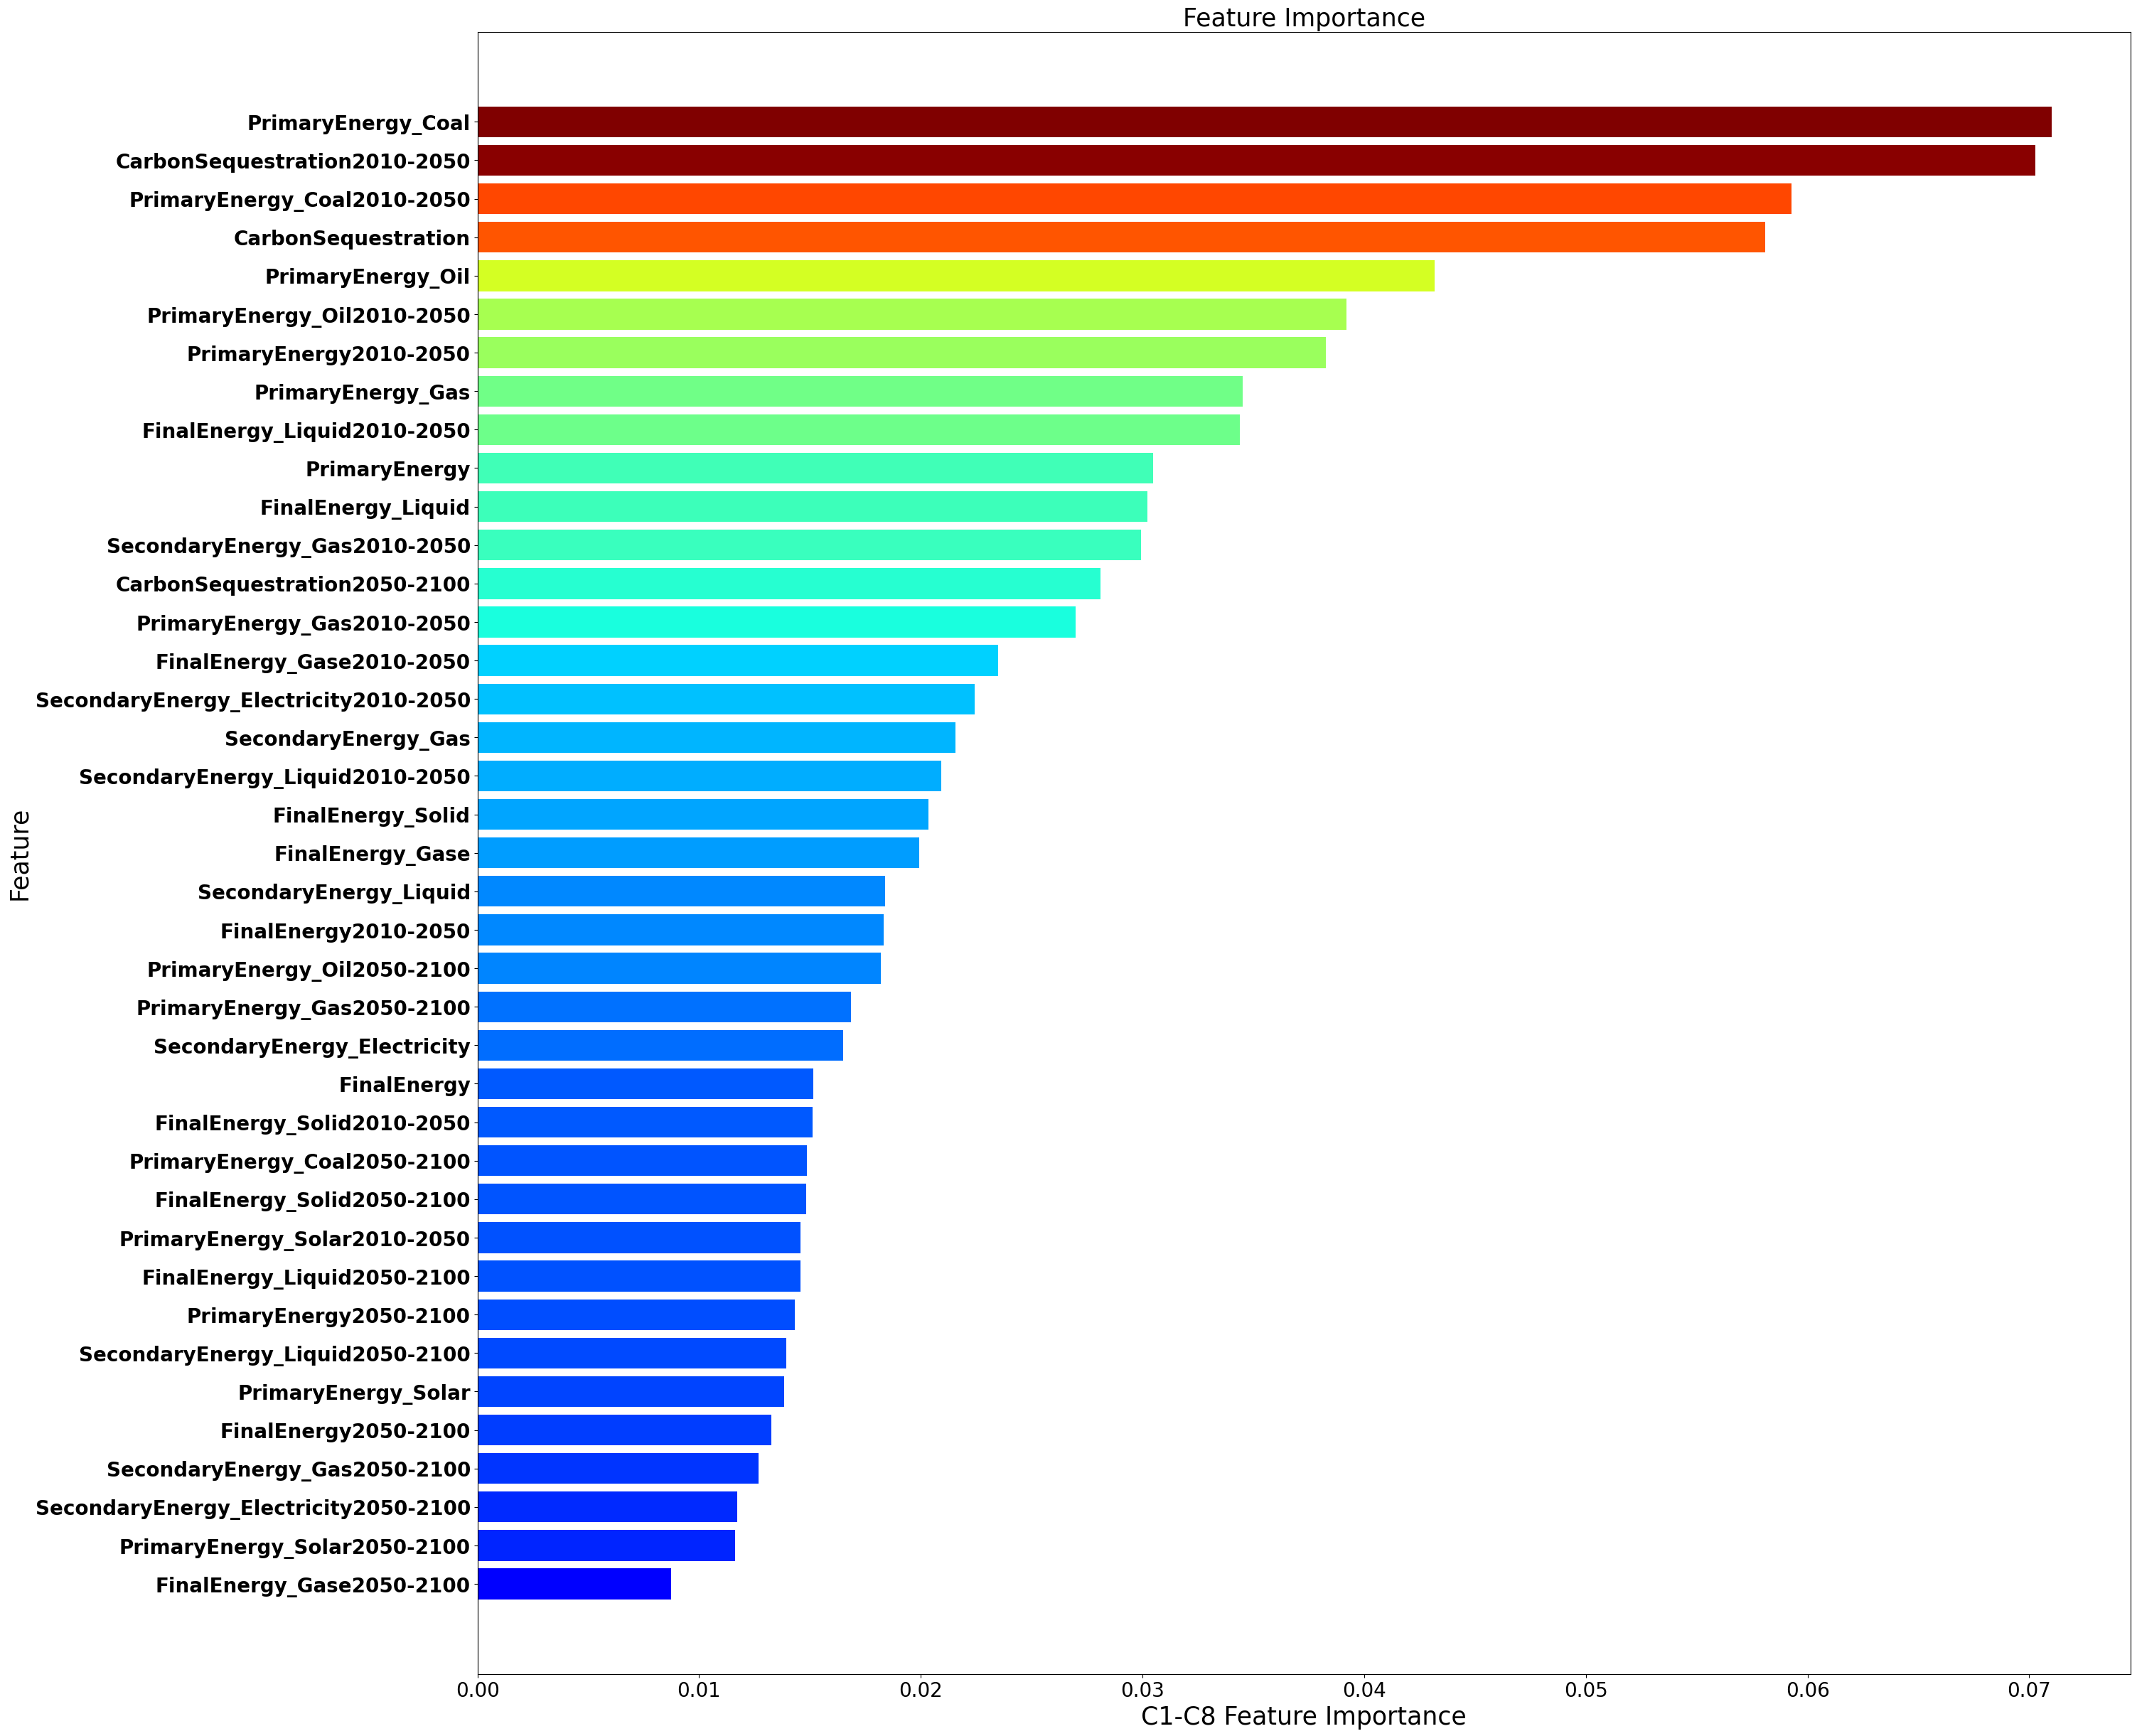

In [28]:
plt.figure(figsize=(30, 30))
sorted_df = feature_importance_df.sort_values(by='Importance', ascending=True)
colors = plt.cm.jet(sorted_df['Importance'] / np.max(sorted_df['Importance']))
plt.barh(sorted_df['Feature'], sorted_df['Importance'],color = colors)
plt.xlabel('C1-C8 Feature Importance',fontsize=25)
plt.ylabel('Feature',fontsize=25)
plt.title('Feature Importance',fontsize=25)
plt.yticks(fontsize=20,weight='bold')
plt.xticks(fontsize=20)
#plt.savefig('C1-C8-Category-2010-2050-2100 + Accmulation.pdf',format='pdf',bbox_inches='tight')
plt.show()

In [29]:
#Aggregate the categories and then train the random forest model
mapping = {1:1,2:1,3:1,4:1,5:2,6:2,7:3,8:3}
DataSet['Category'].replace(mapping,inplace=True)

In [32]:
X = DataSet.drop(columns='Category')
y = DataSet['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

#Create random forest classifier object
classifier2 = RandomForestClassifier(random_state=5)
parameters_2 = {
    'n_estimators':[10,100,500,1000,3000],
    'max_depth':[6,8,10,12,14,16],
    'min_samples_split':[4,6,8]
}

# GridSearch and Fitting Model
gridsearch = GridSearchCV(classifier2,parameters_2,cv=3,n_jobs=-1,verbose=2)
gridsearch.fit(X_train,y_train)
print(f"Best Params Founded : {gridsearch.best_params_}")

Fitting 3 folds for each of 90 candidates, totalling 270 fits
Best Params Founded : {'max_depth': 10, 'min_samples_split': 6, 'n_estimators': 100}


In [34]:
# Fitting Model
rf_classifier2 = RandomForestClassifier(n_estimators=100,max_depth=10,min_samples_split=6,random_state=5)
rf_classifier2.fit(X_train, y_train)
y_pred = rf_classifier2.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("Classification accuracy on training datasets:", accuracy)

Classification accuracy on training datasets: 0.9974874371859297


In [35]:
# Predict on test data
y_pred = rf_classifier2.predict(X_test)

# Calculate classification accuracy
accuracy = accuracy_score(y_test, y_pred)
print("classification accuracy:", accuracy)

classification accuracy: 0.965


In [36]:
#Feature Importance
importance = rf_classifier2.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
print(feature_importance_df)
#The importance score of each feature is ranked from largest to smallest

                                 Feature  Importance
13          CarbonSequestration2010-2050    0.126002
6                     PrimaryEnergy_Coal    0.122147
0                    CarbonSequestration    0.085221
8                      PrimaryEnergy_Oil    0.068442
19           PrimaryEnergy_Coal2010-2050    0.062062
18                PrimaryEnergy2010-2050    0.055136
7                      PrimaryEnergy_Gas    0.044447
21            PrimaryEnergy_Oil2010-2050    0.040825
16           FinalEnergy_Liquid2010-2050    0.035295
3                     FinalEnergy_Liquid    0.030424
26          CarbonSequestration2050-2100    0.027392
5                          PrimaryEnergy    0.025590
20            PrimaryEnergy_Gas2010-2050    0.020939
14                  FinalEnergy2010-2050    0.020576
24          SecondaryEnergy_Gas2010-2050    0.019964
12                SecondaryEnergy_Liquid    0.019693
11                   SecondaryEnergy_Gas    0.017845
25       SecondaryEnergy_Liquid2010-2050    0.

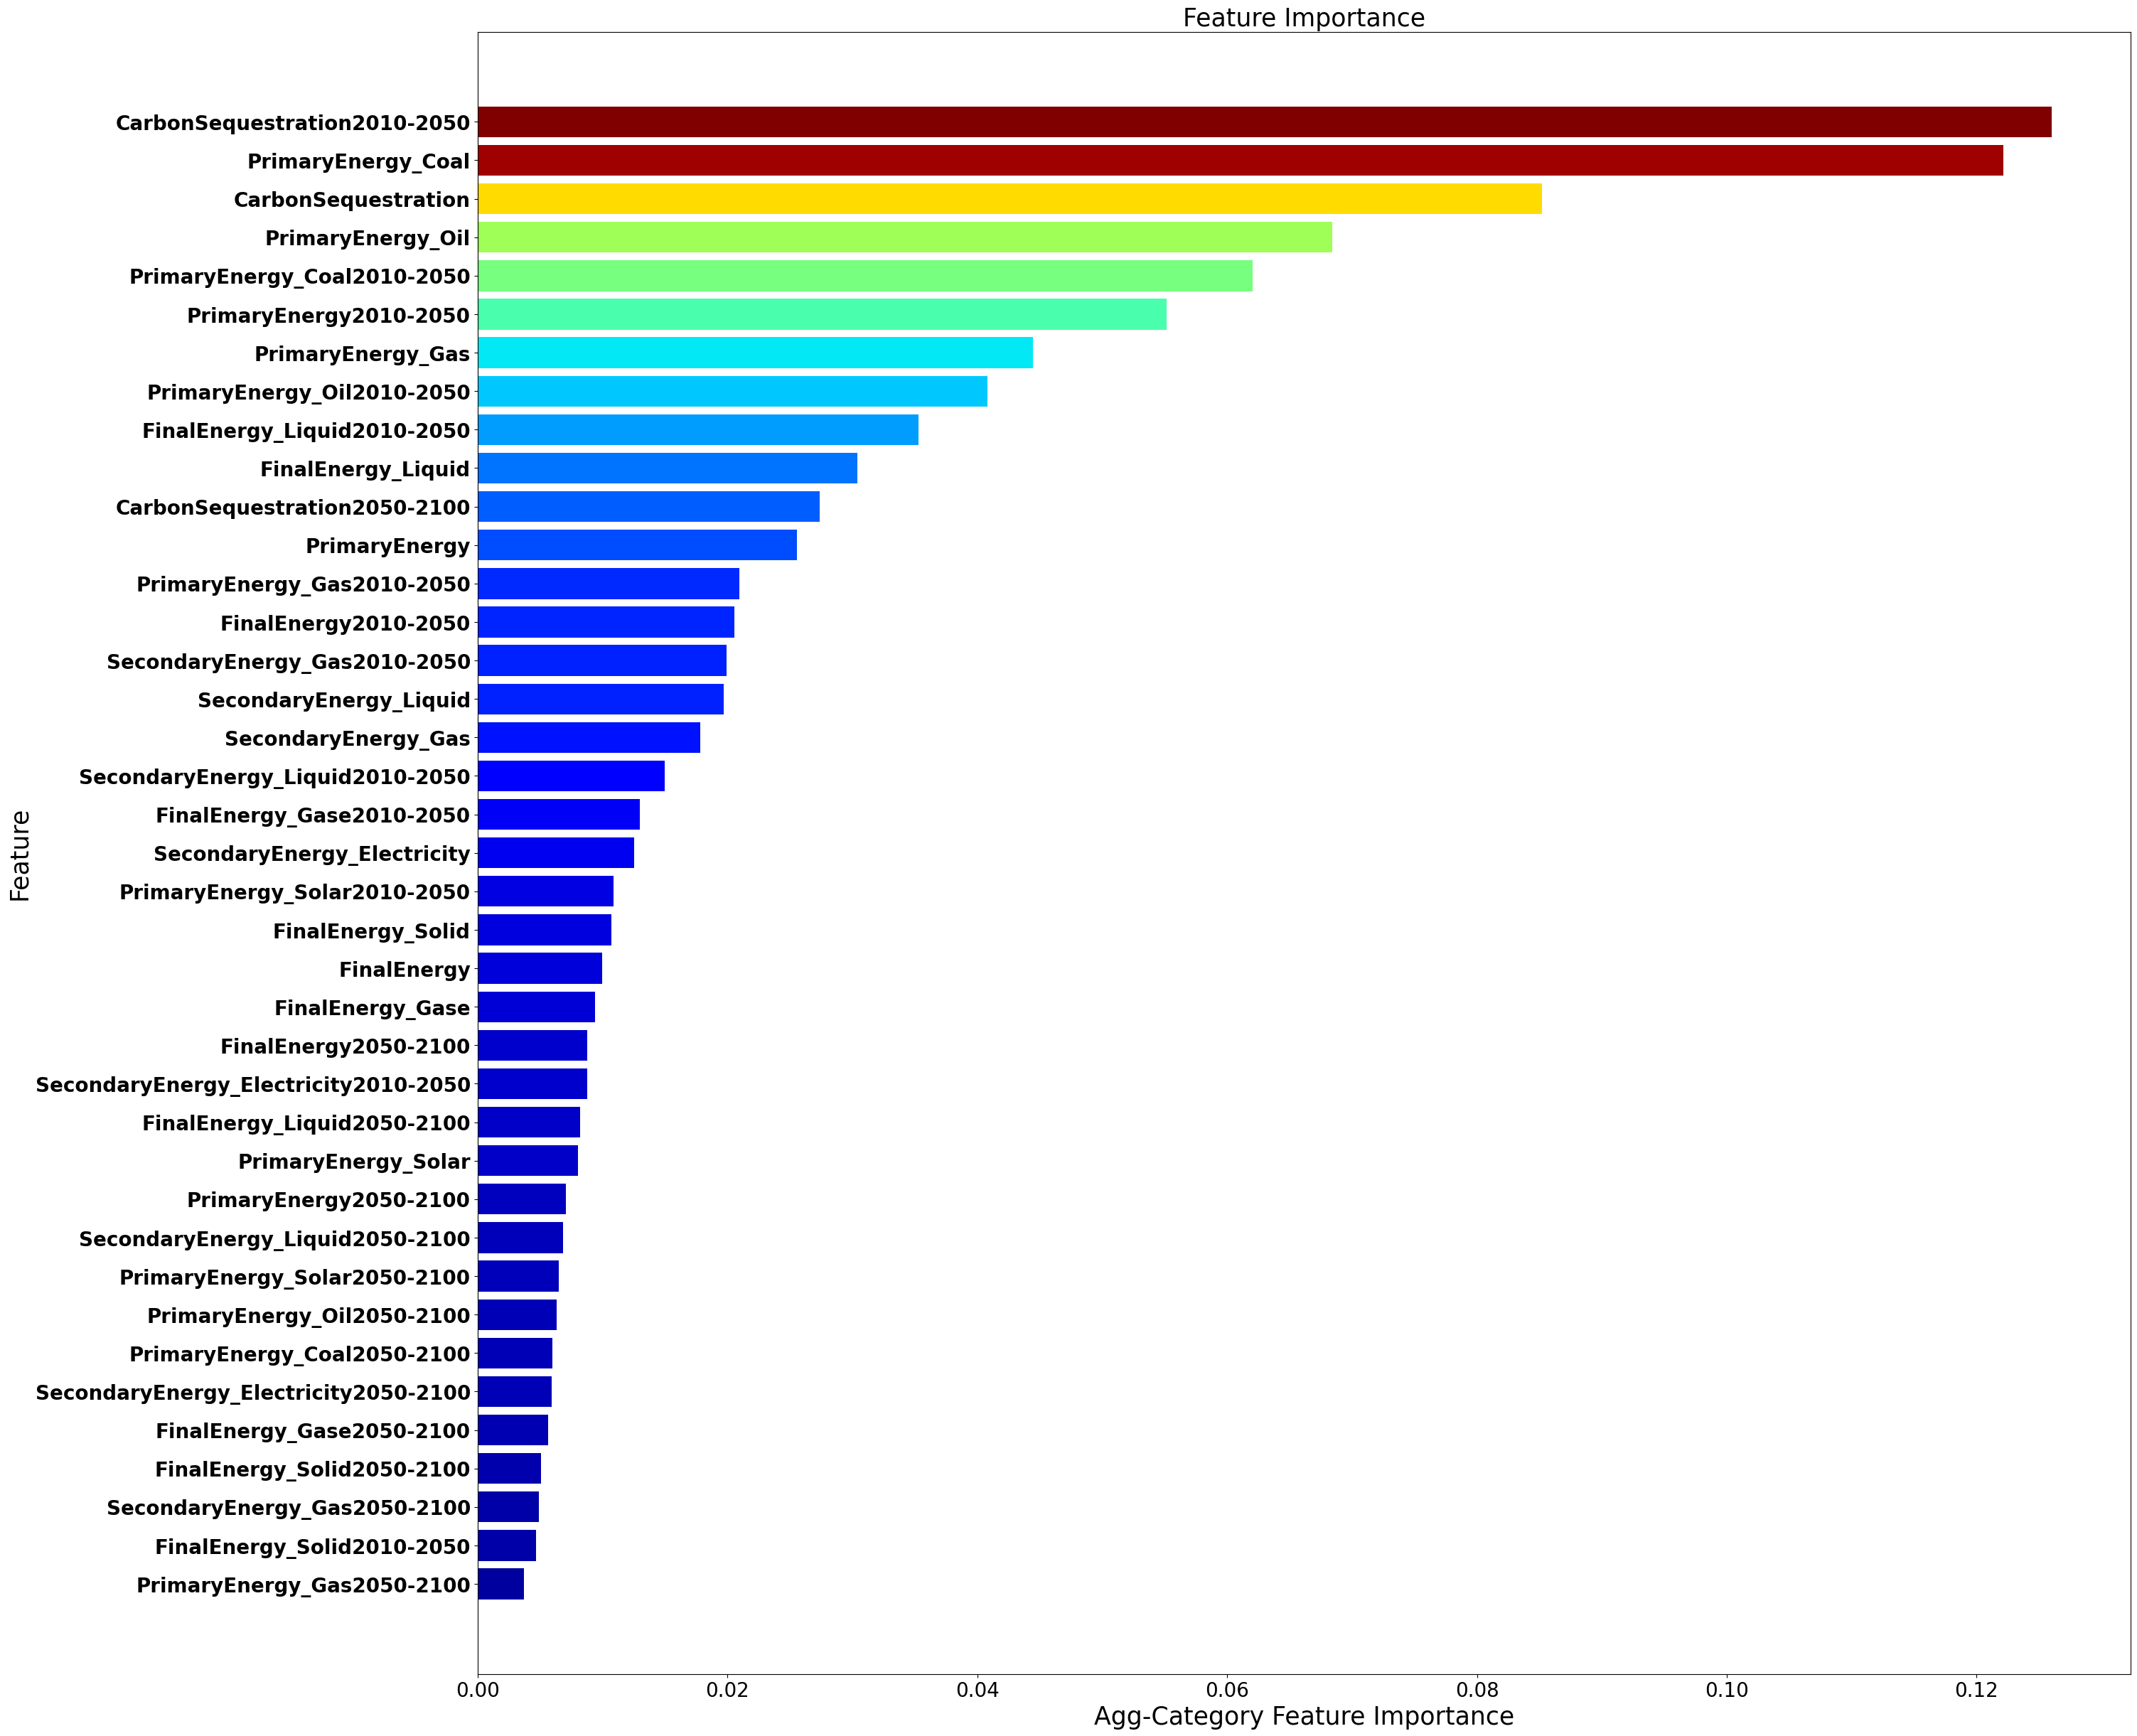

In [37]:
plt.figure(figsize=(30, 30))
sorted_df = feature_importance_df.sort_values(by='Importance', ascending=True)
colors = plt.cm.jet(sorted_df['Importance'] / np.max(sorted_df['Importance']))
plt.barh(sorted_df['Feature'], sorted_df['Importance'],color = colors)
plt.xlabel('Agg-Category Feature Importance',fontsize=25)
plt.ylabel('Feature',fontsize=25)
plt.title('Feature Importance',fontsize=25)
plt.yticks(fontsize=20,weight='bold')
plt.xticks(fontsize=20)
#plt.savefig('AggCategory-2010-2050-2100 + Accmulation.pdf',format='pdf',bbox_inches='tight')
plt.show()